In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sentiment-training.csv')
df.columns = ['Tweets', 'Sentiment']
df.head(10)

,Tweets,Sentiment
0,If you tire of Non-Fiction.. Check out http://...,neutral
1,Ghost of Round Island is supposedly nonfiction.,neutral
2,Why is Barnes and Nobles version of the Kindle...,negative
3,@Maria: Do you mean the Nook? Be careful bo...,positive
4,kindle is awesome! mines great,positive
5,I love mine!!!!,positive
6,Meh. I think Singles are a bad idea. Big name ...,negative
7,My daugjhter loves hers!,positive
8,I am not sure if i just got my update but now ...,negative
9,Got a Kindle for Xmas and I love it. Never w...,positive


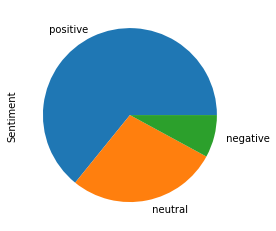

In [368]:
#Checking to see How many of each type of tweet there are
df['Sentiment'].value_counts().plot(kind = 'pie')

#We notice that the maximum number of tweets are positive
#Negative tweets have the least amount of tweets

In [369]:
#Data cleaning
import string
from string import punctuation
import re

# def remove_punctuations(x):
#     for i in string.punctuation:
#         x = x.replace(punctuation, '')
#     return x


df['Processed Tweets'] = df['Tweets'].map(lambda x:x.lower())
# df.head()


#Removing URLs, punctuations, special characters, mentions and emails
df['Processed Tweets'] = df['Processed Tweets'].map(lambda x: re.sub('http\S+', '', x))
df['Processed Tweets'] = df['Processed Tweets'].map(lambda x: re.sub('www\S+', '', x))
df['Processed Tweets'] = df['Processed Tweets'].map(lambda x: re.sub('[,\.!?;:_~`&#+-=/(/))]', '', x))
df['Processed Tweets'] = df['Processed Tweets'].map(lambda x: re.sub('@[A-za-z0-9]+', '', x))
df['Processed Tweets'] = df['Processed Tweets'].map(lambda x: re.sub('\S+@\S+', '', x))

df.head(30)


,Tweets,Sentiment,Processed Tweets
0,If you tire of Non-Fiction.. Check out http://...,neutral,if you tire of nonfiction check out
1,Ghost of Round Island is supposedly nonfiction.,neutral,ghost of round island is supposedly nonfiction
2,Why is Barnes and Nobles version of the Kindle...,negative,why is barnes and nobles version of the kindle...
3,@Maria: Do you mean the Nook? Be careful bo...,positive,do you mean the nook be careful books you ...
4,kindle is awesome! mines great,positive,kindle is awesome mines great
5,I love mine!!!!,positive,i love mine
6,Meh. I think Singles are a bad idea. Big name ...,negative,meh i think singles are a bad idea big name au...
7,My daugjhter loves hers!,positive,my daugjhter loves hers
8,I am not sure if i just got my update but now ...,negative,i am not sure if i just got my update but now ...
9,Got a Kindle for Xmas and I love it. Never w...,positive,got a kindle for xmas and i love it never wa...


In [370]:
#Removing stopwords
import nltk
import string
from string import punctuation
nltk.download('stopwords')
from nltk.corpus import stopwords
stops_en = stopwords.words('english')
processes_tweets = []
#print(stops_en)


# sentence = 'I hate this product ???????'
# for i in sentence:
#     if (i not in stops_en) and (i not in punctuation):
#       processes_tweets.append(i)
      

df['Clean Tweets'] = df['Processed Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops_en)]))
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweets,Sentiment,Processed Tweets,Clean Tweets
0,If you tire of Non-Fiction.. Check out http://...,neutral,if you tire of nonfiction check out,tire nonfiction check
1,Ghost of Round Island is supposedly nonfiction.,neutral,ghost of round island is supposedly nonfiction,ghost round island supposedly nonfiction
2,Why is Barnes and Nobles version of the Kindle...,negative,why is barnes and nobles version of the kindle...,barnes nobles version kindle much expensive ki...
3,@Maria: Do you mean the Nook? Be careful bo...,positive,do you mean the nook be careful books you ...,mean nook careful books buy kindle piece elect...
4,kindle is awesome! mines great,positive,kindle is awesome mines great,kindle awesome mines great
5,I love mine!!!!,positive,i love mine,love mine
6,Meh. I think Singles are a bad idea. Big name ...,negative,meh i think singles are a bad idea big name au...,meh think singles bad idea big name authors al...
7,My daugjhter loves hers!,positive,my daugjhter loves hers,daugjhter loves
8,I am not sure if i just got my update but now ...,negative,i am not sure if i just got my update but now ...,sure got update dont location numbers unless p...
9,Got a Kindle for Xmas and I love it. Never w...,positive,got a kindle for xmas and i love it never wa...,got kindle xmas love never much book reader fu...


In [371]:
#Tokenisation
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
tweets = list(df['Clean Tweets'])
# for i in tweets:
#   abc = word_tokenize(i)
#   print(abc)

abc = df.apply(lambda x: nltk.word_tokenize(x['Clean Tweets']), axis=1)
print(abc)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                               [tire, nonfiction, check]
1          [ghost, round, island, supposedly, nonfiction]
2       [barnes, nobles, version, kindle, much, expens...
3       [mean, nook, careful, books, buy, kindle, piec...
4                         [kindle, awesome, mines, great]
                              ...                        
1993       [liked, youth, oriented, think, widen, appeal]
1994    [think, point, commercial, even, borders, clos...
1995       [kindle, great, product, could, happier, mine]
1996    [develop, way, share, books, big, drawback, lo...
1997                                       [love, kindle]
Length: 1998, dtype: object


In [372]:
#Lemmatisation
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')


tweets = list(df['Clean Tweets'])
#print(tweets)
# tweets[:10]

from nltk.tokenize import word_tokenize, sent_tokenize
wnl = nltk.WordNetLemmatizer()
# for t in abc:
#   df.apply(lambda x: wnl.lemmatize(x), axis=1)
#     # print(t,',',wnl.lemmatize(t))

df['Lemmatized Tweets'] = abc.apply(lambda lst:[wnl.lemmatize(word) for word in lst])
df.head(50)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweets,Sentiment,Processed Tweets,Clean Tweets,Lemmatized Tweets
0,If you tire of Non-Fiction.. Check out http://...,neutral,if you tire of nonfiction check out,tire nonfiction check,"[tire, nonfiction, check]"
1,Ghost of Round Island is supposedly nonfiction.,neutral,ghost of round island is supposedly nonfiction,ghost round island supposedly nonfiction,"[ghost, round, island, supposedly, nonfiction]"
2,Why is Barnes and Nobles version of the Kindle...,negative,why is barnes and nobles version of the kindle...,barnes nobles version kindle much expensive ki...,"[barnes, noble, version, kindle, much, expensi..."
3,@Maria: Do you mean the Nook? Be careful bo...,positive,do you mean the nook be careful books you ...,mean nook careful books buy kindle piece elect...,"[mean, nook, careful, book, buy, kindle, piece..."
4,kindle is awesome! mines great,positive,kindle is awesome mines great,kindle awesome mines great,"[kindle, awesome, mine, great]"
5,I love mine!!!!,positive,i love mine,love mine,"[love, mine]"
6,Meh. I think Singles are a bad idea. Big name ...,negative,meh i think singles are a bad idea big name au...,meh think singles bad idea big name authors al...,"[meh, think, single, bad, idea, big, name, aut..."
7,My daugjhter loves hers!,positive,my daugjhter loves hers,daugjhter loves,"[daugjhter, love]"
8,I am not sure if i just got my update but now ...,negative,i am not sure if i just got my update but now ...,sure got update dont location numbers unless p...,"[sure, got, update, dont, location, number, un..."
9,Got a Kindle for Xmas and I love it. Never w...,positive,got a kindle for xmas and i love it never wa...,got kindle xmas love never much book reader fu...,"[got, kindle, xmas, love, never, much, book, r..."


### SVM

In [373]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

In [374]:
X = df['Clean Tweets']
Y = df['Sentiment']
X

0                                   tire nonfiction check
1                ghost round island supposedly nonfiction
2       barnes nobles version kindle much expensive ki...
3       mean nook careful books buy kindle piece elect...
4                              kindle awesome mines great
                              ...                        
1993              liked youth oriented think widen appeal
1994    think point commercial even borders closing ma...
1995              kindle great product could happier mine
1996    develop way share books big drawback love kind...
1997                                          love kindle
Name: Clean Tweets, Length: 1998, dtype: object

In [375]:
#construct features using tfidf
import numpy as np
Tfidf = TfidfVectorizer(max_features=1000, stop_words='english', use_idf=True, ngram_range=(1,2))

X = Tfidf.fit_transform(X)



In [376]:
X.shape

(1998, 1000)

In [377]:
print(Tfidf.get_feature_names_out())
#features_names = Tfidf.get_feature_names_out


['able' 'absolutely' 'absolutely love' 'access' 'account' 'actual'
 'actual book' 'actually' 'add' 'addicted' 'adore' 'adore kindle' 'adult'
 'adults' 'afford' 'africa' 'ago' 'agree' 'allow' 'amazon'
 'amazon account' 'amazon kindle' 'american' 'android' 'annoying' 'answer'
 'app' 'appreciate' 'archive' 'archived' 'archived items' 'archives'
 'arent' 'arm' 'article' 'asked' 'assume' 'audio' 'audio books' 'author'
 'authors' 'available' 'away' 'away drinking' 'awesome' 'babies' 'baby'
 'bad' 'band' 'battery' 'beach' 'bed' 'beginning' 'believe' 'benefit'
 'best' 'best gift' 'best gifts' 'best thing' 'bet' 'better' 'bible' 'big'
 'birthday' 'bit' 'black' 'book' 'book im' 'book kindle' 'book lives'
 'book love' 'books' 'books available' 'books entirely' 'books free'
 'books im' 'books kindle' 'books read' 'bookstore' 'bought'
 'bought kindle' 'bread' 'brilliant' 'bring' 'btw' 'built'
 'built dictionary' 'built light' 'builtin' 'builtin dictionary' 'button'
 'buy' 'buy kindle' 'buying' 'cab

In [378]:
#Dividing the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train.shape, X_test.shape

((1398, 1000), (600, 1000))

In [379]:
#Building the LinearSVC SVM Model
ModelSVM = LinearSVC()
ModelSVM.fit(X_train, Y_train)

LinearSVC()

In [380]:
#Predicting values
Y_pred = ModelSVM.predict(X_test)

In [381]:
#Printing the classification report to check accuracy
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    negative       0.94      0.62      0.75        55
     neutral       0.76      0.87      0.81       157
    positive       0.94      0.93      0.93       388

    accuracy                           0.89       600
   macro avg       0.88      0.81      0.83       600
weighted avg       0.89      0.89      0.88       600



In [382]:
#Testing on new data
string1 = ' i hate this book'
vec = Tfidf.transform([string1])
ModelSVM.predict(vec)

array([' neutral'], dtype=object)

In [383]:
#Function to get the features with most importance
def GetFeatureImportance(classifier, features_names):
  feature_importance = (
      pd.DataFrame(
          {
              'Feature':Tfidf.get_feature_names_out(), #Feature names in the model
              'Coefficient' : classifier.coef_[0] #These are the coefficients of the features

          }
      )
      .round(decimals = 2).sort_values('Coefficient', ascending = False).style.bar(color=['red','green'], align = 'zero')
  )
  return feature_importance

In [384]:
#Getting the top important features of SVM Model
GetFeatureImportance(ModelSVM, features_names)

,Feature,Coefficient
687,problem,1.800000
47,bad,1.660000
296,freezing,1.530000
755,rude,1.450000
588,miss,1.440000
24,annoying,1.370000
28,archive,1.320000
9,addicted,1.310000
153,complaining,1.290000
990,wrong,1.280000


### LOGISTIC REGRESSION

In [385]:
#Building a logistic regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [386]:
ModelLR = LogisticRegression()
ModelLR.fit(X_train, Y_train)

LogisticRegression()

In [387]:
#Predicting values
Y_pred = ModelLR.predict(X_test)

In [388]:
#Printing the classification report to check accuracy
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    negative       1.00      0.02      0.04        55
     neutral       0.71      0.78      0.74       157
    positive       0.85      0.94      0.89       388

    accuracy                           0.81       600
   macro avg       0.85      0.58      0.56       600
weighted avg       0.83      0.81      0.78       600



In [389]:
#Testing on new data
string1 = ' thank u for 100 points again :)'
vec = Tfidf.transform([string1])
ModelLR.predict(vec)

array([' positive'], dtype=object)

### LOGISTIC REGRESSION WITH TUNED HYPERPARAMATERS

In [390]:
#Building Logistic Regression Model with Tuned hyperpaprameters
ModelLR1 = LogisticRegression(solver = 'lbfgs', C=10)
ModelLR1.fit(X_train, Y_train)

LogisticRegression(C=10)

In [391]:
#Predicting values
Y1_pred = ModelLR1.predict(X_test)

In [392]:
#Printing the classification report to check accuracy
print(classification_report(Y_test, Y1_pred))

              precision    recall  f1-score   support

    negative       0.95      0.64      0.76        55
     neutral       0.77      0.89      0.82       157
    positive       0.95      0.93      0.94       388

    accuracy                           0.89       600
   macro avg       0.89      0.82      0.84       600
weighted avg       0.90      0.89      0.89       600



In [393]:
#Testing on new data
string1 = ' thank u for 100 points again :)'
vec = Tfidf.transform([string1])
ModelLR1.predict(vec)

array([' positive'], dtype=object)

In [394]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
folds = StratifiedKFold (n_splits = 100)



In [395]:
kf = KFold(n_splits = 10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [396]:
#Accuracy on 10-fold cross validation on the training set.
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr', C=10), X, Y,cv=10)

array([0.96      , 0.985     , 0.955     , 0.975     , 0.975     ,
       0.96      , 0.985     , 0.955     , 0.97487437, 0.96984925])

In [397]:
ModelLR1.coef_

array([[-1.36769384, -0.1967136 , -0.1967136 , ...,  0.77693212,
        -0.31187736,  0.70495541],
       [ 0.59803988, -0.42248775, -0.42248775, ...,  0.05739046,
        -0.42367344, -0.65321251],
       [ 0.76965396,  0.61920135,  0.61920135, ..., -0.83432258,
         0.7355508 , -0.05174291]])

In [398]:
#Getting the top important features of the Logistic Regression Model
GetFeatureImportance(ModelLR1, features_names)

,Feature,Coefficient
687,problem,4.030000
47,bad,3.440000
588,miss,3.240000
783,set,3.220000
296,freezing,3.150000
962,way,2.950000
523,library,2.930000
755,rude,2.890000
24,annoying,2.780000
990,wrong,2.630000


### DECISION TREE

In [399]:
#Building a Decision Tree
from sklearn import tree
X = df['Clean Tweets']
Y = df['Sentiment']

X = Tfidf.fit_transform(X)

In [400]:
ModelDecisionTree = tree.DecisionTreeClassifier()
ModelDecisionTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [401]:
#Predicitng Values
Y_pred = ModelLR.predict(X_test)

In [402]:
#Printing the classification report to check accuracy
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    negative       1.00      0.02      0.04        55
     neutral       0.71      0.78      0.74       157
    positive       0.85      0.94      0.89       388

    accuracy                           0.81       600
   macro avg       0.85      0.58      0.56       600
weighted avg       0.83      0.81      0.78       600



### IMPORTANT FEATURES

Therefore, after analysing the features through all three models, I have chosen the Logistic Regression Model with tuned hyperparameters as the best model. This is because of its high accuracy on 10 fold cross validation without overfitting the data. We can see that the top 10 important features are:
1. problem
2. bad
3. rid
4. miss
5. wrong
6. freezing
7. set
8. sending
9. rude
10. kindle read